## The LA Clippers and Russell Westbrook

A playground analysis of the Los Angeles Clippers' performance during the NBA season, with a focus on the impact of Russell Westbrook joining the team. As a die-hard Clippers fan, the goal of this project was to experiment with the NBA API, various Python data visualization packages, and gain insights into the team's performance and player statistics.

### Importing libraries and loading data

We use the NBA API to fetch game logs and shot chart data, providing detailed information about team performance and individual player statistics. The data is then processed and visualized using Python libraries such as pandas, matplotlib, and seaborn to create a variety of plots and charts.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nba_api.stats.static import teams
from nba_api.stats.endpoints import teamgamelog, leaguegamefinder, commonplayerinfo
from matplotlib.patches import Circle, Rectangle, Arc
from nba_api.stats.endpoints import shotchartdetail

In [3]:
# get NBA teams and Clippers team ID
nba_teams = teams.get_teams()
clippers = [team for team in nba_teams if team['abbreviation'] == 'LAC'][0]
clippers_id = clippers['id']

# get game logs for the Clippers
gamelog_clippers = teamgamelog.TeamGameLog(team_id=clippers_id).get_data_frames()[0]

### Preprocessing

In [4]:
# preprocessing game logs data
gamelog_clippers['GAME_DATE'] = pd.to_datetime(gamelog_clippers['GAME_DATE'])
gamelog_clippers = gamelog_clippers.sort_values(by='GAME_DATE', ascending=True)
gamelog_clippers.reset_index(drop=True, inplace=True)

# calculating cumulative wins, games played, and win percentage
gamelog_clippers['CUMULATIVE_WINS'] = gamelog_clippers['WL'].apply(lambda x: 1 if x == 'W' else 0).cumsum()
gamelog_clippers['CUMULATIVE_GAMES'] = gamelog_clippers.index + 1
gamelog_clippers['CUMULATIVE_WIN_PCT'] = gamelog_clippers['CUMULATIVE_WINS'] / gamelog_clippers['CUMULATIVE_GAMES']

In [5]:
# extracting points allowed from the MATCHUP column
gamelog_clippers['PTS_AGAINST'] = pd.to_numeric(gamelog_clippers['MATCHUP'].str.extract(r'(\d+)$', expand=False), errors='coerce')
gamelog_clippers['PTS_AGAINST'].fillna(0, inplace=True)
gamelog_clippers['POINT_DIFF'] = gamelog_clippers['PTS'] - gamelog_clippers['PTS_AGAINST']

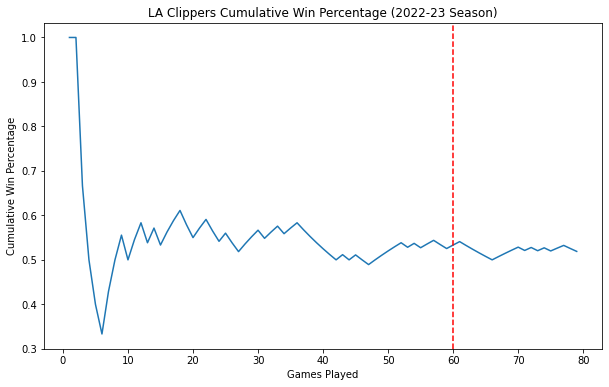

In [6]:
# cumulative win percentage
plt.figure(figsize=(10, 6))
sns.lineplot(x='CUMULATIVE_GAMES', y='CUMULATIVE_WIN_PCT', data=gamelog_clippers)
plt.axvline(x=60, color='red', linestyle='--')
plt.xlabel('Games Played')
plt.ylabel('Cumulative Win Percentage')
plt.title('LA Clippers Cumulative Win Percentage (2022-23 Season)')
plt.show()

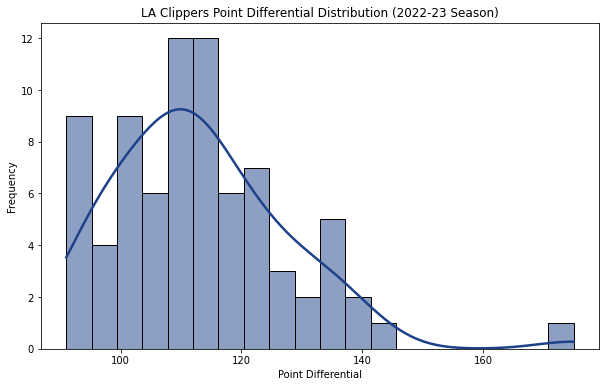

In [7]:
# distribution of point differentials
plt.figure(figsize=(10, 6))
sns.histplot(gamelog_clippers['POINT_DIFF'], kde=True, bins=20, color='#1D428A', line_kws={"color": "#C8102E", "linewidth": 2.5})
plt.xlabel('Point Differential')
plt.ylabel('Frequency')
plt.title('LA Clippers Point Differential Distribution (2022-23 Season)')
plt.show()

### Westbrook's Impact

Analyzing the Los Angeles Clippers' performance before and after Russell Westbrook joined the team. We calculate win percentage, PPG, and average rebounds before and after Westbrook's arrival. The code also generates a bar chart to visualize the team's performance in various statistical categories (points, assists, rebounds, turnovers, field goal percentage, three-point field goal percentage, and free throw percentage) before and after Westbrook joined the team. This provides an easy way to compare the team's performance in these categories and see if there have been any significant changes.

In [9]:
# splitting game logs based on the date when Russell Westbrook joined
gamelog_clippers_rw = gamelog_clippers.loc[gamelog_clippers['GAME_DATE'] >= '2023-02-24']
gamelog_clippers_pre_rw = gamelog_clippers.loc[gamelog_clippers['GAME_DATE'] <= '2023-02-24']

Here, we calculate key metrics for the Clippers before and after Westbrook's arrival

In [11]:
clippers_win_pct_pre_rw = gamelog_clippers_pre_rw['WL'].eq('W').mean()
clippers_win_pct_rw = gamelog_clippers_rw['WL'].eq('W').mean()

num_games_rw = len(gamelog_clippers_rw)
num_games_total = len(gamelog_clippers)
num_games_wo_rw = num_games_total - num_games_rw

win_pct_before = gamelog_clippers_pre_rw['WL'].eq('W').mean()
win_pct_after = gamelog_clippers_rw['WL'].eq('W').mean()
pts_per_game_before = gamelog_clippers_pre_rw['PTS'].mean()
pts_per_game_after = gamelog_clippers_rw['PTS'].mean()
reb_per_game_before = gamelog_clippers_pre_rw['REB'].mean()
reb_per_game_after = gamelog_clippers_rw['REB'].mean()

print(f"The Clippers' win percentage before Westbrook joined the team: {win_pct_before:.3f}")
print(f"The Clippers' win percentage since Westbrook joined the team: {win_pct_after:.3f}")
print(f"The Clippers' average points per game before Westbrook joined the team: {pts_per_game_before:.1f}")
print(f"The Clippers' average points per game since Westbrook joined the team: {pts_per_game_after:.1f}")
print(f"The Clippers' average rebounds per game before Westbrook joined the team: {reb_per_game_before:.1f}")
print(f"The Clippers' average rebounds per game since Westbrook joined the team: {reb_per_game_after:.1f}")

The Clippers' win percentage before Westbrook joined the team: 0.532
The Clippers' win percentage since Westbrook joined the team: 0.444
The Clippers' average points per game before Westbrook joined the team: 112.5
The Clippers' average points per game since Westbrook joined the team: 118.7
The Clippers' average rebounds per game before Westbrook joined the team: 43.5
The Clippers' average rebounds per game since Westbrook joined the team: 41.7


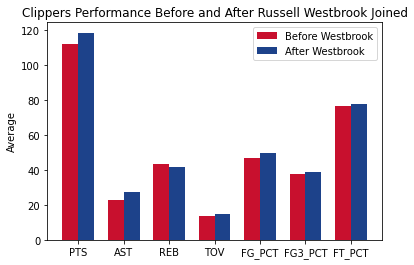

In [41]:
stats = ['PTS', 'AST', 'REB', 'TOV', 'FG_PCT', 'FG3_PCT', 'FT_PCT']

clippers_before = gamelog_clippers_pre_rw[stats].mean()
clippers_after = gamelog_clippers_rw[stats].mean()
clippers_before[['FG_PCT', 'FG3_PCT', 'FT_PCT']] *= 100
clippers_after[['FG_PCT', 'FG3_PCT', 'FT_PCT']] *= 100
clippers_before[['FG_PCT', 'FG3_PCT', 'FT_PCT']] = clippers_before[['FG_PCT', 'FG3_PCT', 'FT_PCT']].round(0).astype(int)
clippers_after[['FG_PCT', 'FG3_PCT', 'FT_PCT']] = clippers_after[['FG_PCT', 'FG3_PCT', 'FT_PCT']].round(0).astype(int)
clippers_colors = ['#C8102E', '#1D428A']

x = np.arange(len(stats))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, clippers_before, width, label='Before Westbrook', color=clippers_colors[0])
rects2 = ax.bar(x + width/2, clippers_after, width, label='After Westbrook', color=clippers_colors[1])

ax.set_ylabel('Average')
ax.set_title('Clippers Performance Before and After Russell Westbrook Joined')
ax.set_xticks(x)
ax.set_xticklabels(stats)
ax.legend()

plt.show()

#### Further Analysis of Russell Westbrook

Here, we fetche Russell Westbrook's shot chart data for the 2022-23 regular season and visualize it in three different ways: a scatter plot of shot locations, a histogram of shot distances, and a bar chart of shot distribution by shot zone. These visualizations provide insights into Westbrook's individual shooting performance during the season. The scatter plot of shot locations helps to identify where Westbrook tends to take his shots on the court, the histogram of shot distances shows the frequency of shots taken at different distances, and the bar chart of shot distribution by shot zone highlights the areas on the court where Westbrook attempts the most shots.

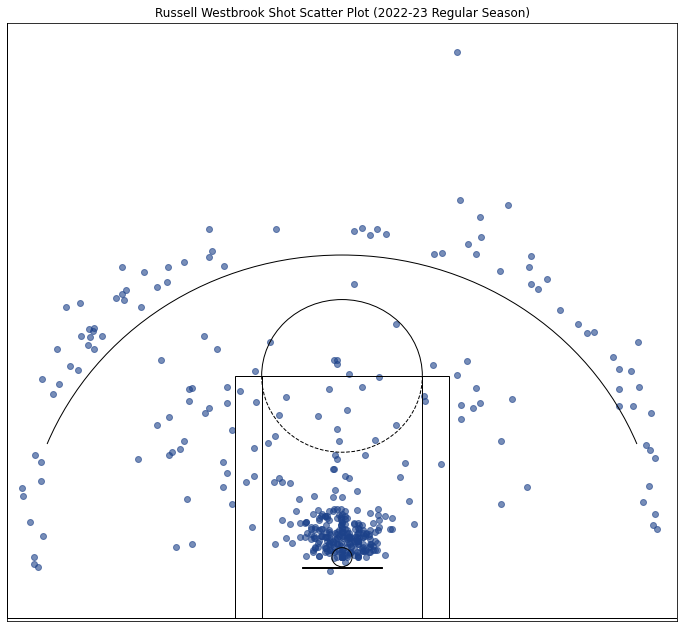

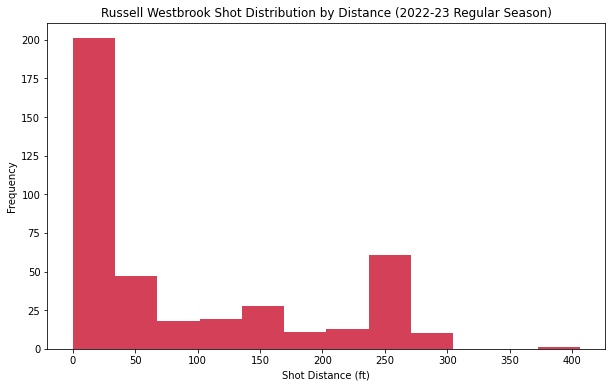

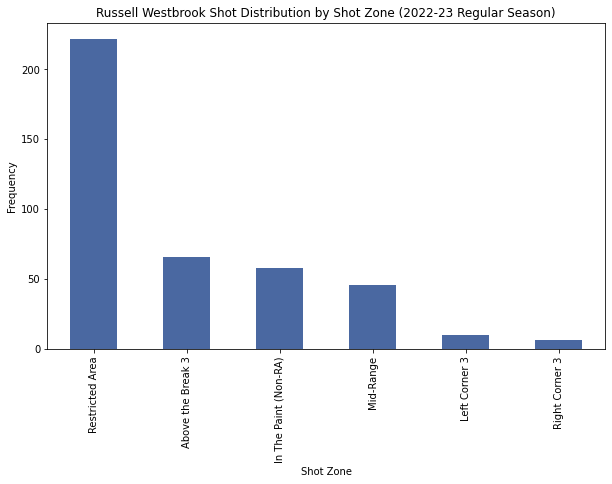

In [42]:
player_id = 201566 # Westbrook

# set the season and season type
season = '2022-23'
season_type = 'Regular Season'

# set a generic team ID
team_id = 0

# fetch the shot chart data
shotchart = shotchartdetail.ShotChartDetail(team_id=team_id, player_id=player_id, season_type_all_star=season_type, season_nullable=season)
shot_df = shotchart.get_data_frames()[0]

# convert 'SHOT_DISTANCE' column to a numeric data type
shot_df['SHOT_DISTANCE'] = pd.to_numeric(shot_df['SHOT_DISTANCE'], errors='coerce')


# create a function to draw the court
def draw_court(ax=None, color='black', lw=1, outer_lines=False):
    if ax is None:
        ax = plt.gca()

    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=360, linewidth=lw, color=color, linestyle='dashed')
    three_point = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)

    ax.add_patch(hoop)
    ax.add_patch(backboard)
    ax.add_patch(outer_box)
    ax.add_patch(inner_box)
    ax.add_patch(top_free_throw)
    ax.add_patch(bottom_free_throw)
    ax.add_patch(three_point)

    if outer_lines:
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        ax.add_patch(outer_lines)

    ax.set_xlim(-250, 250)
    ax.set_ylim(-50, 420)

    ax.set_xticks([])
    ax.set_yticks([])

    return ax

# distance of each shot
shot_df['SHOT_DISTANCE'] = np.sqrt(shot_df['LOC_X']**2 + shot_df['LOC_Y']**2)

#  shot accuracy by distance
accuracy_by_distance = shot_df.groupby(pd.cut(shot_df['SHOT_DISTANCE'], np.arange(0, 35, 3)))['SHOT_MADE_FLAG'].mean() * 100

# scatter plot of Westbrook's shots
plt.figure(figsize=(12, 11))
ax = plt.scatter(x=shot_df['LOC_X'], y=shot_df['LOC_Y'], c='#1D428A', alpha=0.6)
draw_court(ax=plt.gca(), outer_lines=True)
plt.title(f"Russell Westbrook Shot Scatter Plot ({season} {season_type})")
plt.show()

# plot shot distribution
shot_distribution = shot_df['SHOT_DISTANCE'].plot(kind='hist', bins=12, color='#C8102E', alpha=0.8, figsize=(10, 6))
plt.title(f"Russell Westbrook Shot Distribution by Distance ({season} {season_type})")
plt.xlabel('Shot Distance (ft)')
plt.ylabel('Frequency')
plt.show()

# shot distribution by shot zone
plt.figure(figsize=(10, 6))
distribution_by_zone = shot_df['SHOT_ZONE_BASIC'].value_counts()
ax = distribution_by_zone.plot(kind='bar', color='#1D428A', alpha=0.8)
plt.title(f"Russell Westbrook Shot Distribution by Shot Zone ({season} {season_type})")
plt.xlabel('Shot Zone')
plt.ylabel('Frequency')
plt.show()